In [5]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

Bộ lọc thông cao High-Pass Filter (HPF)

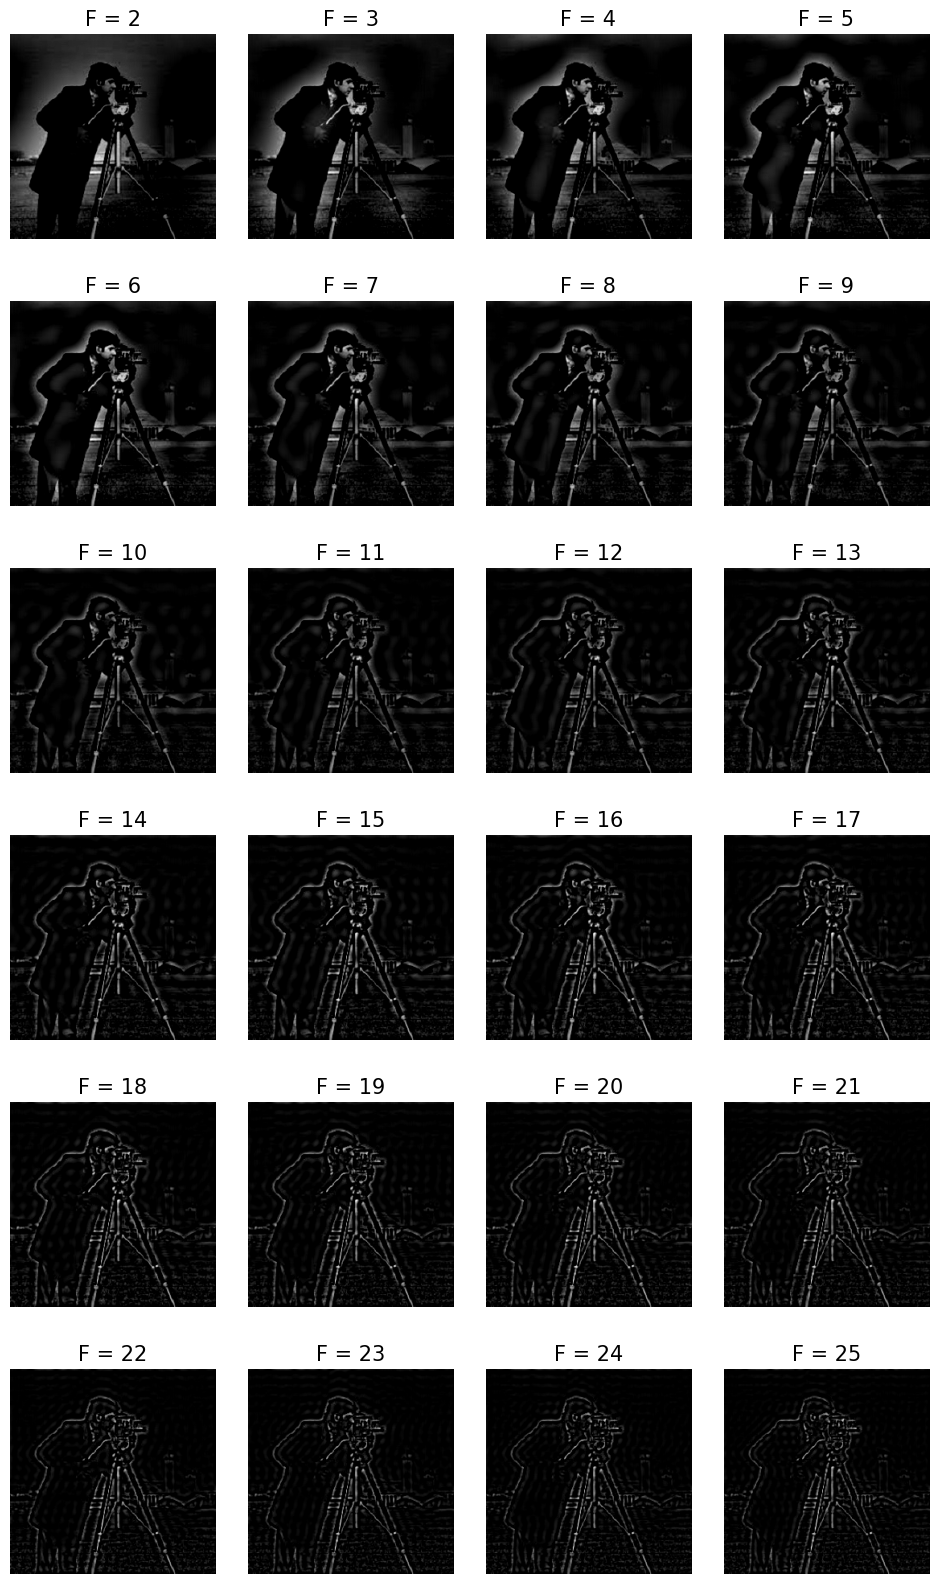

In [6]:
import numpy as np
from PIL import Image
from scipy import fftpack
import matplotlib.pyplot as plt

def calculate_snr(image):
    """Tính Signal-to-Noise Ratio (SNR)"""
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    return mean_signal / std_noise if std_noise != 0 else 0
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fftpack.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w / 2), int(h / 2)
snrs_hp = []
lbs = list(range(1, 25))
plt.figure(figsize=(12, 20))
for l in lbs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2[half_w - l:half_w + l + 1, half_h - l:half_h + l + 1] = 0
    im1 = np.clip(fftpack.ifft2(fftpack.ifftshift(freq2)).real, 0, 255)
    snrs_hp.append(calculate_snr(im1))
    plt.subplot(6, 4, l)
    plt.imshow(im1, cmap='gray')
    plt.axis('off')
    plt.title('F = ' + str(l + 1), size=15)
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()


Low-pass filter (LPF)

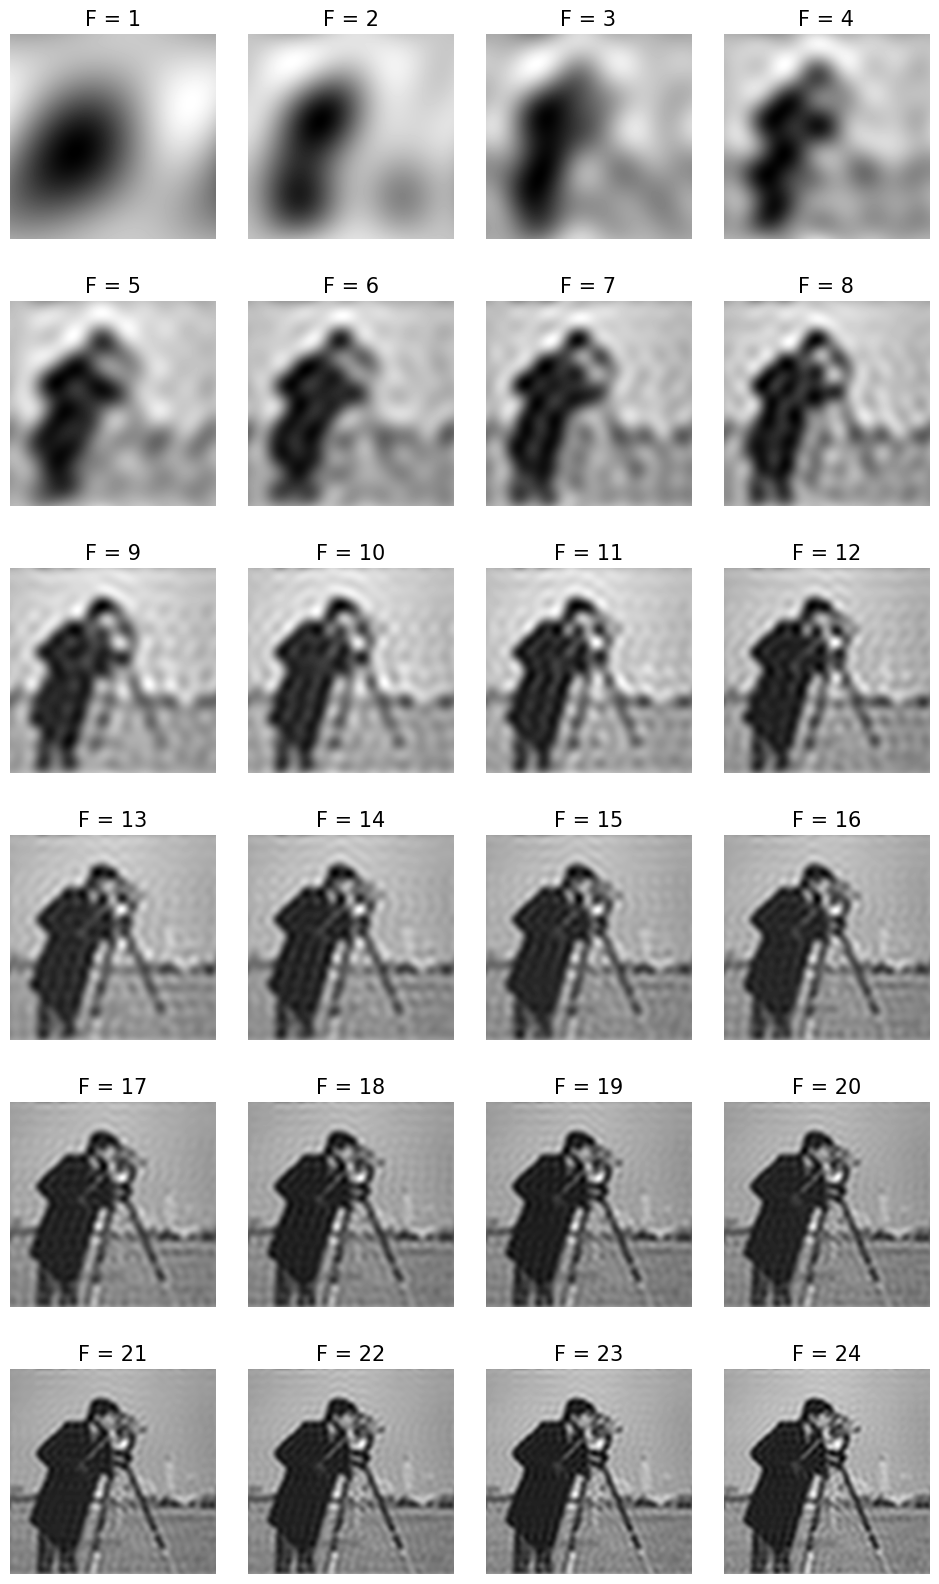

In [7]:
import numpy as np
from PIL import Image
from scipy import fftpack
import matplotlib.pyplot as plt
def calculate_snr(image):
    """Tính Signal-to-Noise Ratio (SNR)."""
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    return mean_signal / std_noise if std_noise != 0 else 0
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fftpack.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w / 2), int(h / 2)
snrs_lp = []
ubs = list(range(1, 25))
plt.figure(figsize=(12, 20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w - u:half_w + u + 1, half_h - u:half_h + u + 1] = 0
    freq2 -= freq2_low
    im1 = fftpack.ifft2(fftpack.ifftshift(freq2)).real
    snrs_lp.append(calculate_snr(im1))
    plt.subplot(6, 4, u)
    plt.imshow(im1, cmap='gray')
    plt.axis('off')
    plt.title(f'F = {u}', size=15)
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()